In [ ]:
import pandas as pd

credit_data = pd.read_csv('Micro-credit-Data-file.csv')

# Data Understanding and Cleaning

In [ ]:
credit_data.head()

In [ ]:
credit_data.shape

In [ ]:
credit_data.info()

In [ ]:
credit_data.describe()

In [ ]:
credit_data.isnull().sum().sum()

No Null/Missing Values

# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = credit_data['label'].value_counts()
keys = [0,1]
explode = [0, 0.1]

plt.pie(data, labels=keys,explode=explode,autopct='%.0f%%')

plt.show()

12% is Non-default and remaining 88% is Default - Only 12 % of credit card holders are paybacking their credit amount in 5 days and 88% of customers are following their credits due perfectly

In [ ]:
# removing first column and object columns
credit_data.drop(['Unnamed: 0','msisdn','pcircle','pdate'],axis=1,inplace=True)
credit_data.info()

In [ ]:
credit_data.corr()

<Axes: >

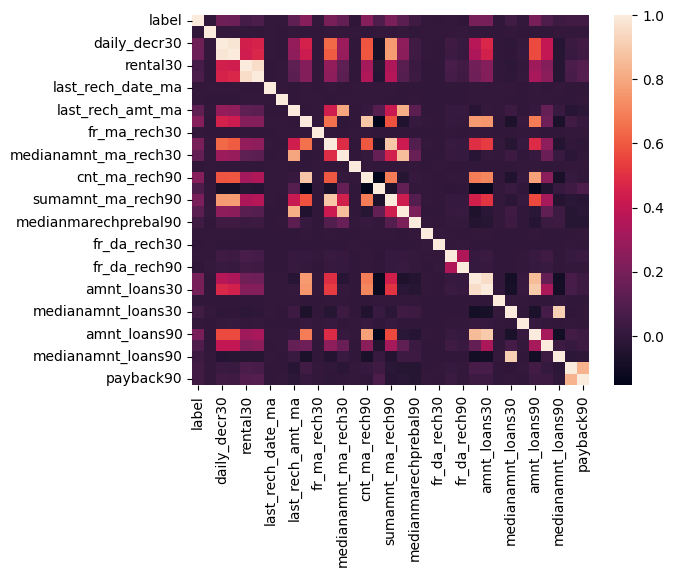

In [134]:
corr_data = credit_data
corr = corr_data.corr()
sns.heatmap(corr,annot_kws={'size':10})

<ipython-input-135-11de227f697d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_data[col],ax=ax[i],color='red')
<ipython-input-135-11de227f697d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_data[col],ax=ax[i],color='red')
<ipython-input-135-11de227f697d>:11: UserWarning: 



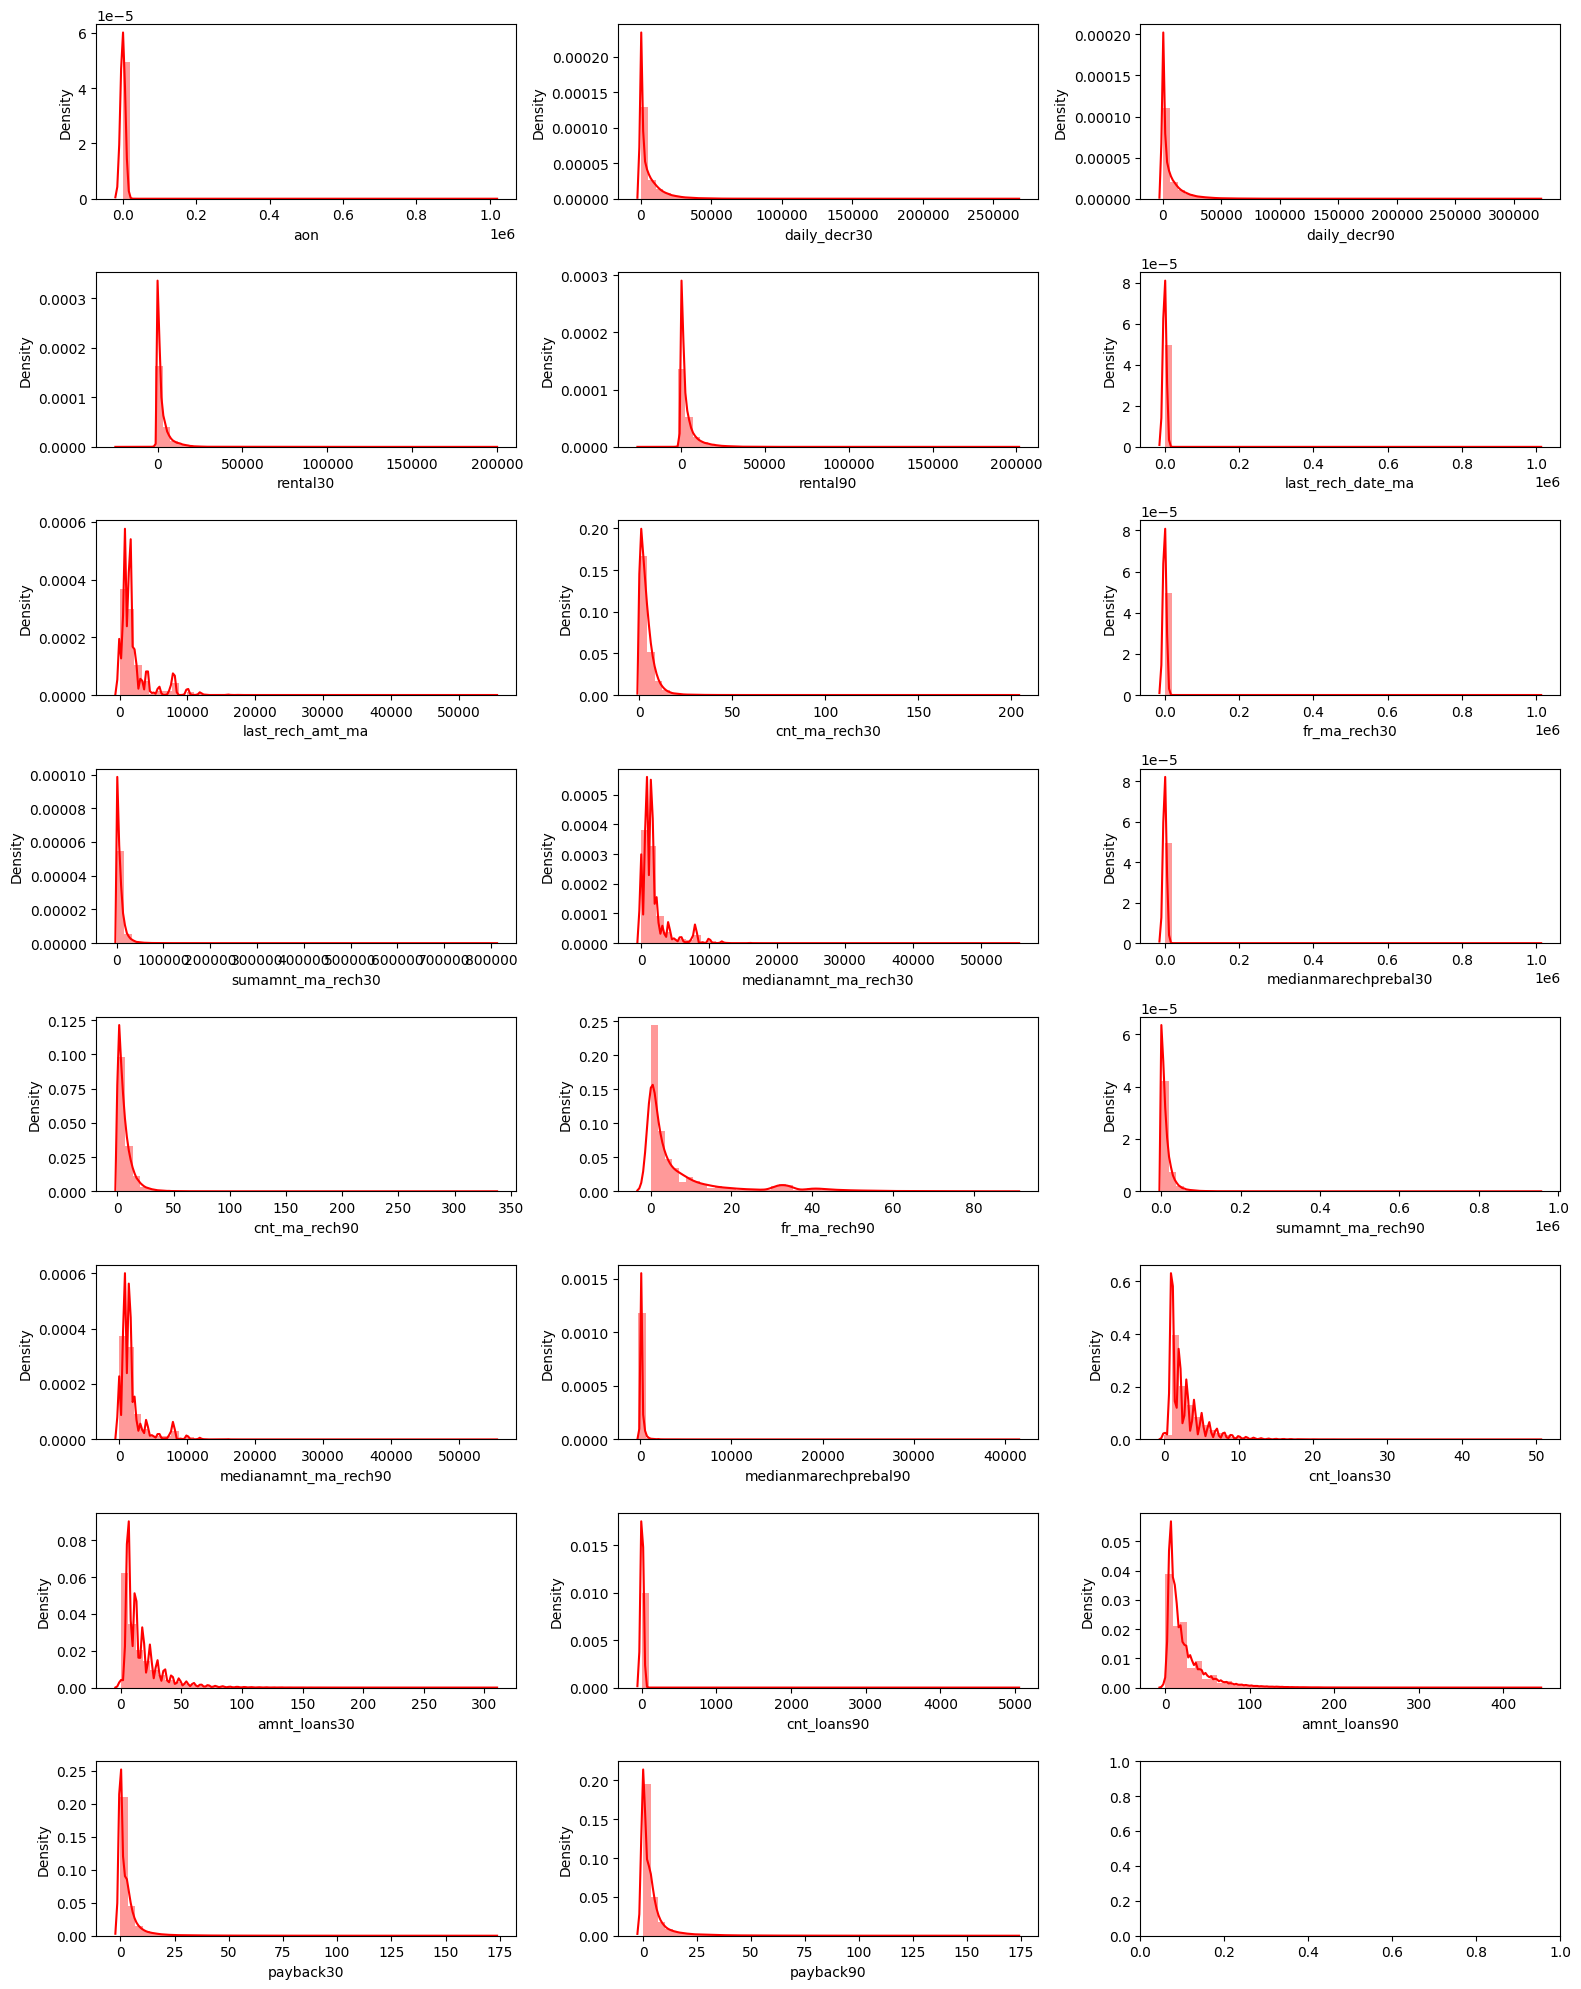

In [135]:
columns=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90']
fig,ax = plt.subplots(8,3,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(credit_data[col],ax=ax[i],color='red')
plt.tight_layout()
plt.show()

**Outlier Transformation:**

Several changes were made to the dataset to prepare it for analysis. As there are no null values in the data set there is no need to perform any null value imputation for the data set. There are outliers for many variables in the data set.

By observing these features, I found way of doing an outlier’s imputation technique for the data of the features whose z-score >3.

For this data set I simply choose mean for imputing the outliers with the respective features.

So, outlier imputation is far better than simply removing the outliers from the data.

# Model Building

In [136]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np


pca=PCA()
pca.fit(credit_data)

PCA()

In [137]:
data_pca= pca.transform(credit_data)

In [138]:
X1=data_pca
y1=credit_data['label']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

In [139]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

print('Training score =', LR.score(X_train, y_train))
print('Test score =', LR.score(X_test, y_test))

Training score = 0.45597927955560097
Test score = 0.4575368173287954


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


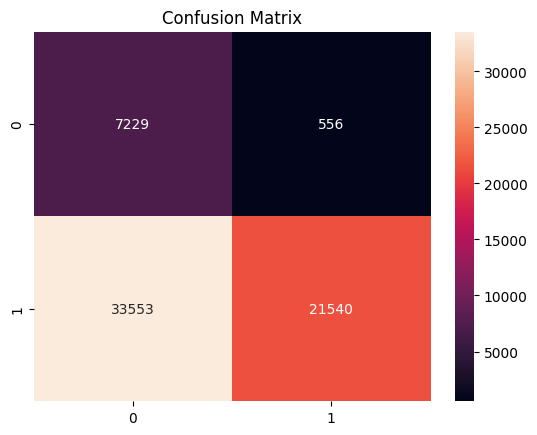

In [142]:
ypred = LR.predict(X_test)
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [141]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.4575368173287954
Precision = 0.974837074583635
Recall = 0.3909752600148839
F1 Score = 0.5581106116156447


In [143]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': ypred})

# Save the DataFrame to a CSV file
results_df.to_csv('prediction_results.csv', index=False)

print("Prediction results saved to 'prediction_results.csv'")


Prediction results saved to 'prediction_results.csv'
